<a href="https://colab.research.google.com/github/abkerper/DS4002_Project2/blob/main/draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! git clone https://github.com/abkerper/DS4002_Project2

fatal: destination path 'DS4002_Project2' already exists and is not an empty directory.


In [8]:
import numpy as np
import pandas as pd
import datetime
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [9]:
df_type = pd.read_csv('/content/SA_0000001400.csv')
df_sex = pd.read_csv('/content/SA_0000001688.csv')

In [10]:
df_total = pd.concat([df_type,df_sex])

In [11]:
display(df_total.columns)

Index(['Id', 'IndicatorCode', 'SpatialDimension', 'SpatialDimensionValueCode',
       'ParentLocationCode', 'ParentLocation', 'TimeDimension', 'TimeDim',
       'DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode',
       'DisaggregatingDimension2', 'DisaggregatingDimension2ValueCode',
       'DisaggregatingDimension3', 'DisaggregatingDimension3ValueCode',
       'DataSourceDimension', 'DataSourceDimensionValueCode', 'Value',
       'NumericValue', 'Low', 'High', 'Comments', 'Date', 'TimeDimensionValue',
       'TimeDimensionBegin', 'TimeDimensionEnd'],
      dtype='object')

In [12]:
df_type = df_type[df_type['SpatialDimension']=='COUNTRY']

In [15]:
df_type = df_type[df_type['DisaggregatingDimension1ValueCode']=='ALCOHOLTYPE_SA_TOTAL']

In [16]:
display(df_type.head())

,Id,IndicatorCode,SpatialDimension,SpatialDimensionValueCode,ParentLocationCode,ParentLocation,TimeDimension,TimeDim,DisaggregatingDimension1,DisaggregatingDimension1ValueCode,...,DataSourceDimensionValueCode,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
8,1133,SA_0000001400,COUNTRY,GIN,AFR,Africa,YEAR,1966,ALCOHOLTYPE,ALCOHOLTYPE_SA_TOTAL,...,DATASOURCE_GISAHGIN,0.16,0.16,NaN,NaN,NaN,2018-05-11T09:14:17Z,1966,1966-01-01,1966-12-31
15,2745,SA_0000001400,COUNTRY,POL,EUR,Europe,YEAR,1991,ALCOHOLTYPE,ALCOHOLTYPE_SA_TOTAL,...,DATASOURCE_GISAHPOL,8.63,8.63,NaN,NaN,NaN,2018-05-11T09:17:34Z,1991,1991-01-01,1991-12-31
18,3452,SA_0000001400,COUNTRY,SVN,EUR,Europe,YEAR,1984,ALCOHOLTYPE,ALCOHOLTYPE_SA_TOTAL,...,DATASOURCE_GISAHSVN,17.23,17.23,NaN,NaN,NaN,2018-05-11T09:21:59Z,1984,1984-01-01,1984-12-31
34,5920,SA_0000001400,COUNTRY,VEN,AMR,Americas,YEAR,1973,ALCOHOLTYPE,ALCOHOLTYPE_SA_TOTAL,...,DATASOURCE_GISAHVEN,5.61,5.61,NaN,NaN,NaN,2018-05-11T09:08:11Z,1973,1973-01-01,1973-12-31
43,7475,SA_0000001400,COUNTRY,DJI,EMR,Eastern Mediterranean,YEAR,1992,ALCOHOLTYPE,ALCOHOLTYPE_SA_TOTAL,...,DATASOURCE_GISAHDJI,0.60,0.60,NaN,NaN,NaN,2018-05-11T09:11:48Z,1992,1992-01-01,1992-12-31


In [18]:
df_country = df_type[['SpatialDimensionValueCode','NumericValue','TimeDimensionValue']]

In [26]:
countries = ['AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA','DEU','GRC','HUN','IRL','ITA','LVA','LTU','LUX','MLT','NLD','POL','PRT','ROU','SVK','SVN','ESP','SWE','GBR','USA']

In [27]:
df_country = df_country[df_country['SpatialDimensionValueCode'].isin(countries)]

In [28]:
display(df_country['SpatialDimensionValueCode'].unique())

array(['POL', 'SVN', 'MLT', 'FIN', 'PRT', 'ITA', 'IRL', 'ROU', 'CYP',
       'AUT', 'BEL', 'SVK', 'ESP', 'CZE', 'NLD', 'LVA', 'DEU', 'FRA',
       'SWE', 'USA', 'HUN', 'EST', 'GBR', 'HRV', 'GRC', 'LUX', 'BGR',
       'DNK', 'LTU'], dtype=object)

In [30]:
df_pivot = df_country.pivot(index='TimeDimensionValue', columns='SpatialDimensionValueCode', values='NumericValue')

df_pivot.reset_index(inplace=True)

In [31]:
display(df_pivot.head())

SpatialDimensionValueCode,TimeDimensionValue,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,...,LVA,MLT,NLD,POL,PRT,ROU,SVK,SVN,SWE,USA
0,1960,8.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.83
1,1961,9.31,NaN,NaN,5.15,9.00,11.03,6.54,NaN,NaN,...,NaN,1.99,3.97,6.27,15.02,5.70,9.28,NaN,6.04,7.80
2,1962,9.70,NaN,NaN,4.44,9.12,12.05,6.56,14.64,NaN,...,NaN,1.51,4.29,6.06,15.17,6.92,9.44,NaN,6.10,7.99
3,1963,9.80,9.88,7.25,5.14,9.06,12.85,6.65,13.56,NaN,...,NaN,1.71,4.63,6.22,18.49,7.01,9.35,NaN,6.03,8.14
4,1964,10.70,10.48,6.52,5.22,9.36,13.71,7.23,13.88,NaN,...,NaN,2.07,4.97,6.16,19.37,7.03,10.21,NaN,6.36,8.44


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot time series for each country
sns.lineplot(data=df_pivot.iloc,x='TimeDimensionValue')
plt.title('Alcohol Consumption Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption (Liters per capita)')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.indexing._iLocIndexer'>.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [42]:
countries = df_pivot.columns[1:]
display(len(countries))

29

In [45]:
# Function to plot time series
def plot_series(data):
    fig, axes = plt.subplots(nrows=30, ncols=1, figsize=(10, 8))
    for i, col in enumerate(data.columns):
        data[col].plot(ax=axes[i], title=col)
        axes[i].set_ylabel('Values')
        axes[i].set_xlabel('Date')
    plt.tight_layout()
    plt.show()

# Check stationarity of time series using ADF test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

Step 1: Checking stationarity
Stationarity test for TimeDimensionValue
ADF Statistic: 1.3623081877195062
p-value: 0.9969360027476039
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
Stationarity test for AUT
ADF Statistic: -3.033268508132656
p-value: 0.03190219115250537
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
Stationarity test for USA
ADF Statistic: -3.4905518255069277
p-value: 0.00823308467456736
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596

Step 2: Applying VAR model

Step 3: Forecasting

Step 4: Visualizing forecast


<ipython-input-45-f0690119f884>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


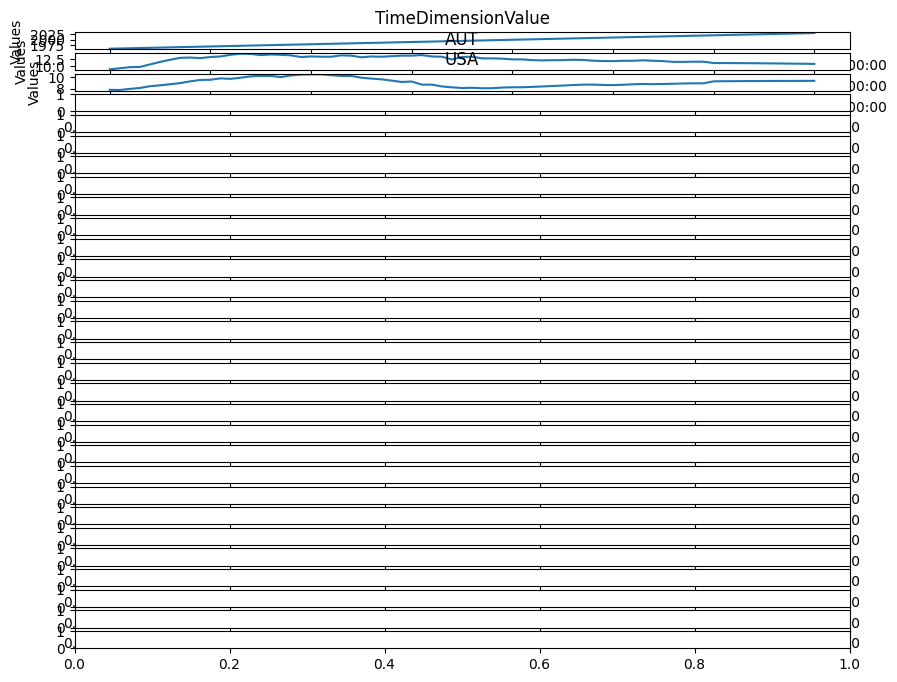

In [48]:
# Section for VAR analysis
def var_analysis(data):
    # Step 1: Check stationarity and visualize the original data

    data = data.dropna(axis=1) # Added line to handle missing values

    print("Step 1: Checking stationarity")
    for col in data.columns:
        print('Stationarity test for', col)
        check_stationarity(data[col])

    # Step 2: Applying VAR model
    print("\nStep 2: Applying VAR model")
    model = VAR(data)
    results = model.fit()

    # Step 3: Forecasting
    print("\nStep 3: Forecasting")
    lag_order = results.k_ar
    forecast = results.forecast(data.values[-lag_order:], steps=10)

    # Step 4: Visualizing forecast
    print("\nStep 4: Visualizing forecast")
    forecast_index = pd.date_range(start='2024-04-11', periods=10)
    forecast_data = pd.DataFrame(forecast, index=forecast_index, columns=data.columns)
    plot_series(pd.concat([data, forecast_data]))

# Perform VAR analysis
var_analysis(df_pivot)